- Karoliny Oliveira - 10368020

- Larissa Lima - 9313516

- Luiz Fernando Santos - 10892680

---

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
np.random.seed(1)

### 1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas λ no intervalo [1,10] e mostre o gráfico da média em função da variância.




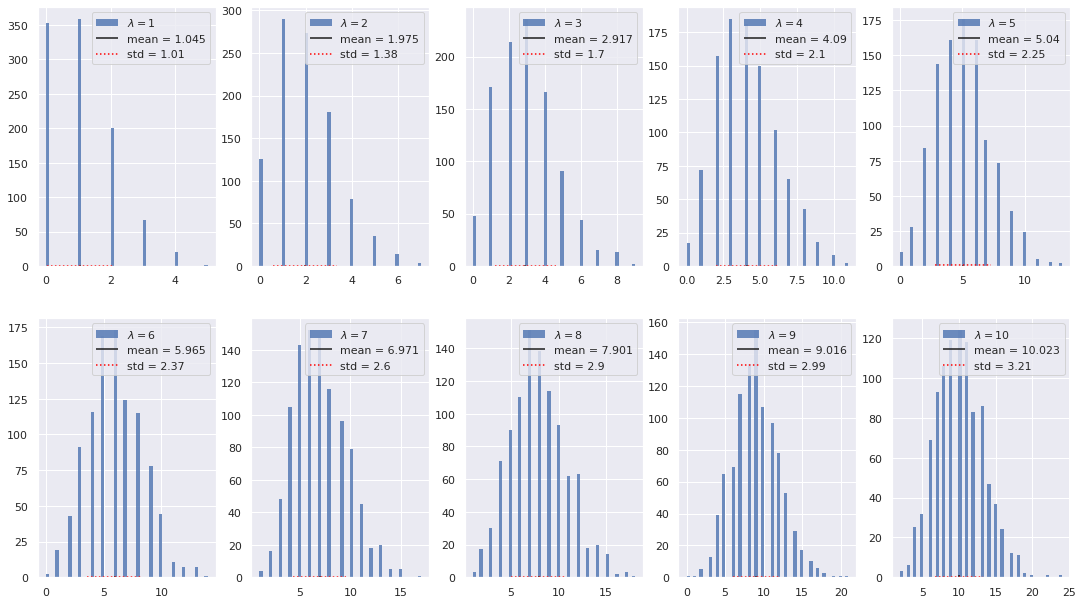

In [2]:
# Gerando valores desejados de lambda
lamb_v = np.arange(1, 11)
fig, axs = plt.subplots(2, 5)
axs = np.append(axs[0], axs[1])

# Gerando e criando visualização das distribuições de Poisson para cada lâmbda
mean_v = []
var_v = []
for i in range(len(lamb_v)):
    lam = lamb_v[i]
    x = np.random.poisson(lam=lam, size=1000)

    mean = np.mean(x)
    var = np.var(x)
    mean_v.append(mean)
    var_v.append(var)

    axs[i].vlines(mean,0,1, label='mean = {}'.format(mean), color='k')
    axs[i].hlines(0.34, mean-np.sqrt(var), mean+np.sqrt(var), color='red', linestyles='dotted', label='std = {}'.format(round(np.sqrt(var), 2)))

    axs[i].hist(x, density=False, bins=50,lw=0,alpha=.8, label=f"$\lambda = {lam}$")
    axs[i].legend()

fig.set_size_inches(18.5, 10.5)
plt.show()

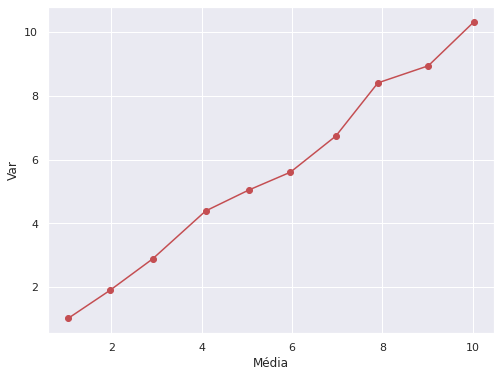

In [3]:
# Plotando média contra variância para cada lambda
plt.figure(figsize=[8,6])
plt.plot(mean_v, var_v, 'o-r')
plt.xlabel("Média")
plt.ylabel("Var")
plt.show()

De fato, para $X \sim Poi(\lambda)$:

$$
Var(X) = E[X] = \lambda
$$

### 2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [4]:
import seaborn as sns
import pandas as pd
from scipy.stats import iqr

# Lendo dados da íris
iris = pd.read_csv("data/iris.csv", header=(0))
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Obtendo média, variância e iqr de cada coluna
for col in iris.columns[:-1]:
    col_data = iris[col]
    media = np.mean(col_data)
    var = np.var(col_data)
    int_quar = iqr(col_data)
    print(f'{col}:\n\t media = {np.round(media,3)}\n\t variancia = {np.round(var,3)}\n\t iqr = {np.round(int_quar,3)}')

sepal_length:
	 media = 5.843
	 variancia = 0.681
	 iqr = 1.3
sepal_width:
	 media = 3.054
	 variancia = 0.187
	 iqr = 0.5
petal_length:
	 media = 3.759
	 variancia = 3.092
	 iqr = 3.5
petal_width:
	 media = 1.199
	 variancia = 0.579
	 iqr = 1.5


### 3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

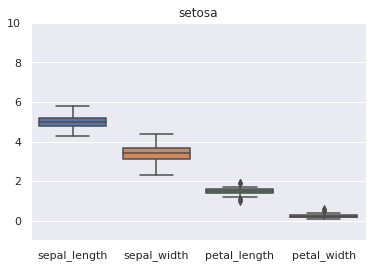

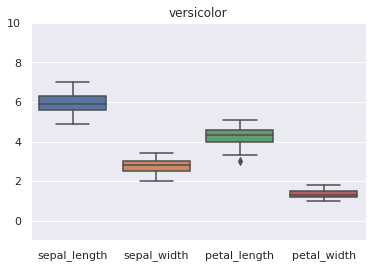

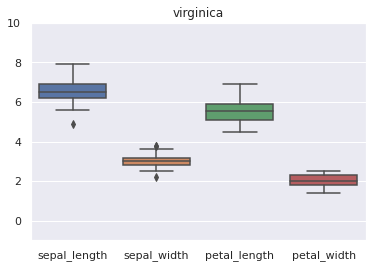

In [6]:
# Plotando o boxplot usando seaborn:
labels = iris["species"].unique()
for label in labels:
    query_expr = "species == '{}'".format(label)
    class_data = iris.query(query_expr)
    sns.boxplot(data=class_data)
    plt.title(label)
    plt.ylim(-1, 10)
    plt.show()

### 4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

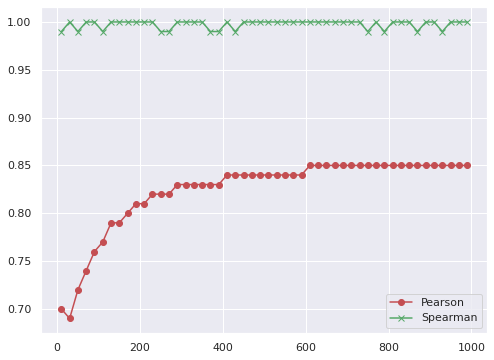

In [7]:
from scipy.stats import pearsonr, spearmanr

# Variaremos N para determinar o comportamente das correlações
pearson_vec = []
spearmanr_vec = []
for N in range(10, 1000, 20):
    x = np.linspace(1, 10000, N) 
    y = np.log(x)

    corr, p_value = pearsonr(x, y)
    corrs, p_values = spearmanr(x, y)
    corr = int(corr*100)/100
    corrs = int(corrs*100)/100
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    
plt.figure(figsize=[8,6])
x = np.arange(10, 1000, 20)
plt.plot(x, pearson_vec, 'o-r', label='Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Spearman')
plt.legend()
plt.show()

### 5 - Considere o código que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0.5*X +$ ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots.

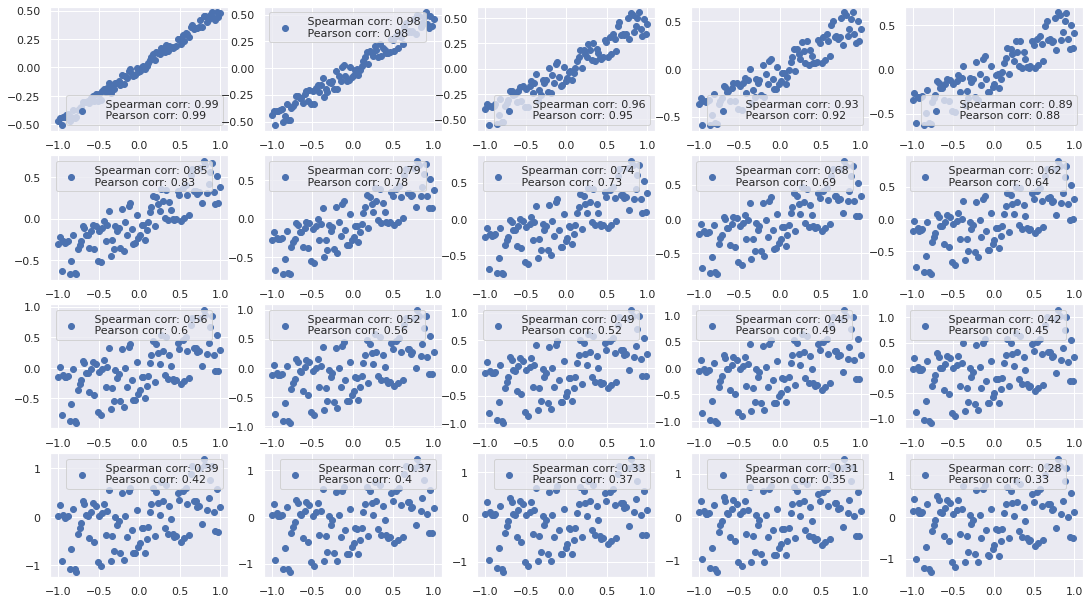

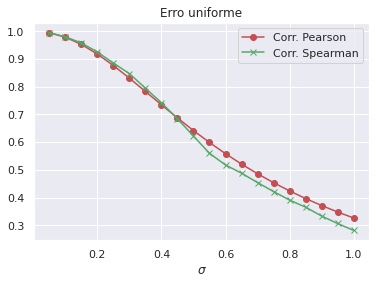

In [8]:
# Trabalharemos com um número constante de pontos
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]

# Gerando o ruído com um erro uniforme e variando a escala (sigma)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.

fig, axs = plt.subplots(4, 5)
axs1 = np.append(axs[0], axs[1])
axs2 = np.append(axs[2], axs[3])
axs = np.append(axs1,axs2)

pearson_vec = []
spearmanr_vec = []
for i in range(0, 20):
    sigma = (i+1)/20
    ruido = erro*sigma
    Y = 0.5*X + ruido
    
    corr, p_value = pearsonr(X, Y)
    corrs, p_values = spearmanr(X, Y)
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    axs[i].scatter(X, Y, label=f' Spearman corr: {round(corrs,2)}\n Pearson corr: {round(corr,2)}')
    axs[i].legend()
fig.set_size_inches(18.5, 10.5)
plt.show()    

# Plotando correlações contra sigma
x = np.arange(1, 21)
x = x/20
plt.plot(x, pearson_vec, 'o-r', label='Corr. Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Corr. Spearman')
plt.xlabel("$\sigma$")
plt.legend()
plt.title("Erro uniforme")
plt.show()

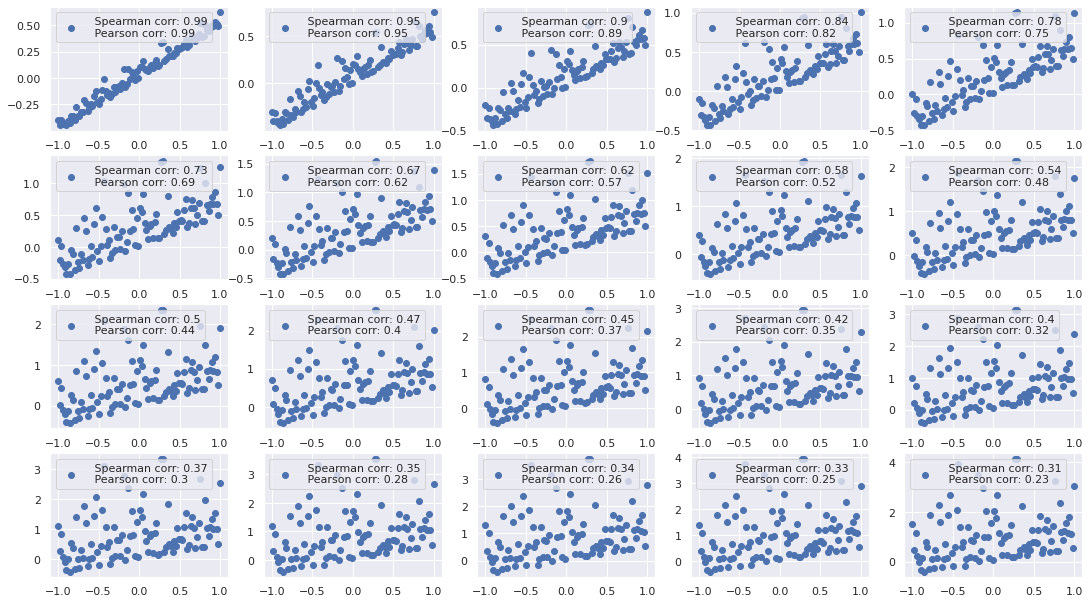

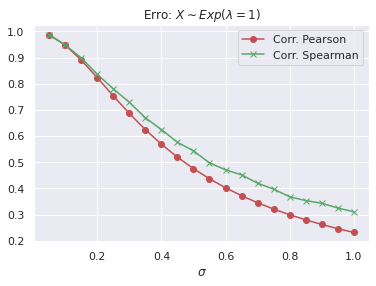

In [9]:
# Podemos tentar também para um erro proveniente de outra distribuição 

# Exponencial:
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]

# Gerando o ruído com um erro uniforme e variando a escala (sigma)
erro = np.random.exponential(1,N) # ruído a ser incluído na relação linear.

fig, axs = plt.subplots(4, 5)
axs1 = np.append(axs[0], axs[1])
axs2 = np.append(axs[2], axs[3])
axs = np.append(axs1,axs2)

pearson_vec = []
spearmanr_vec = []
for i in range(0, 20):
    sigma = (i+1)/20
    ruido = erro*sigma
    Y = 0.5*X + ruido
    
    corr, p_value = pearsonr(X, Y)
    corrs, p_values = spearmanr(X, Y)
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    
    axs[i].scatter(X, Y, label=f' Spearman corr: {round(corrs,2)}\n Pearson corr: {round(corr,2)}')
    axs[i].legend()
fig.set_size_inches(18.5, 10.5)
plt.show()
   
# Plotando correlações contra sigma
x = np.arange(1, 21)
x = x/20
plt.plot(x, pearson_vec, 'o-r', label='Corr. Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Corr. Spearman')
plt.xlabel("$\sigma$")
plt.legend()
plt.title("Erro: $X \sim Exp(\lambda = 1)$")
plt.show()

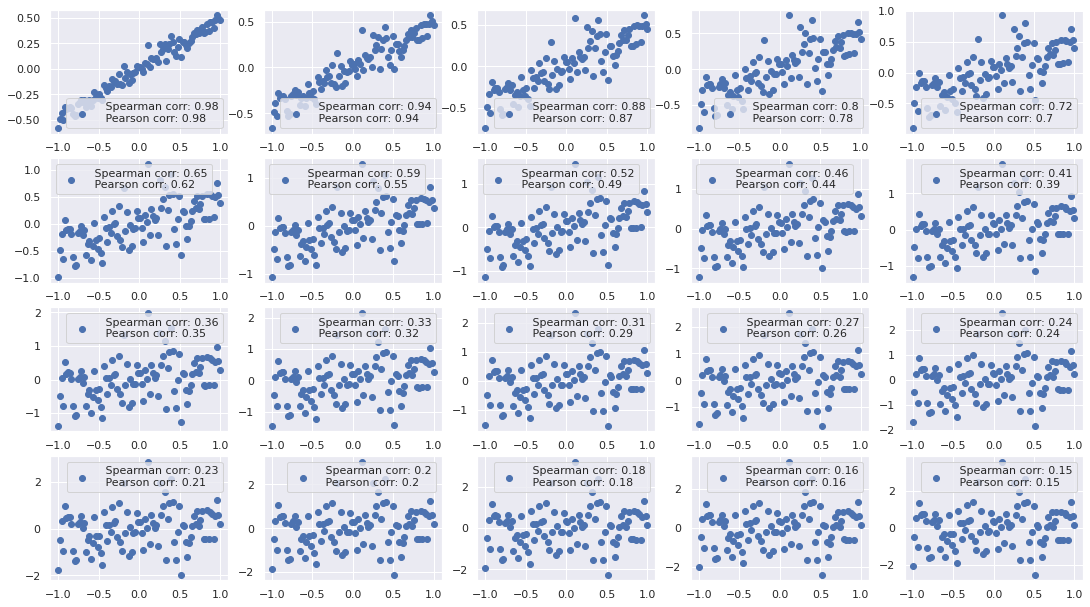

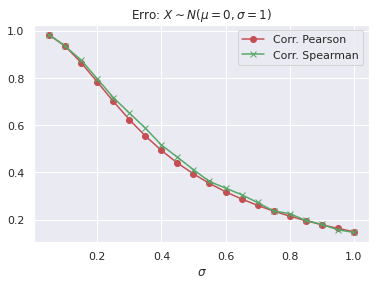

In [10]:
# Normal:
N = 100
X = np.linspace(-1,1, N) # gera N valores em [-1,1]

# Gerando o ruído com um erro uniforme e variando a escala (sigma)
erro = np.random.normal(loc=0, scale=1, size=N) # ruído a ser incluído na relação linear.

fig, axs = plt.subplots(4, 5)
axs1 = np.append(axs[0], axs[1])
axs2 = np.append(axs[2], axs[3])
axs = np.append(axs1,axs2)

pearson_vec = []
spearmanr_vec = []
for i in range(0, 20):
    sigma = (i+1)/20
    ruido = erro*sigma
    Y = 0.5*X + ruido
    
    corr, p_value = pearsonr(X, Y)
    corrs, p_values = spearmanr(X, Y)
    
    pearson_vec.append(corr)
    spearmanr_vec.append(corrs)
    axs[i].scatter(X, Y, label=f' Spearman corr: {round(corrs,2)}\n Pearson corr: {round(corr,2)}')
    axs[i].legend()
fig.set_size_inches(18.5, 10.5)
plt.show()   
    
# Plotando correlações contra sigma
x = np.arange(1, 21)
x = x/20
plt.plot(x, pearson_vec, 'o-r', label='Corr. Pearson')
plt.plot(x, spearmanr_vec, 'x-g', label='Corr. Spearman')
plt.xlabel("$\sigma$")
plt.legend()
plt.title("Erro: $X \sim N(\mu = 0, \sigma = 1)$")
plt.show()

### 6- Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

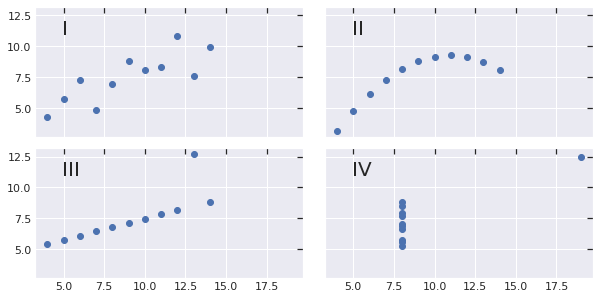

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

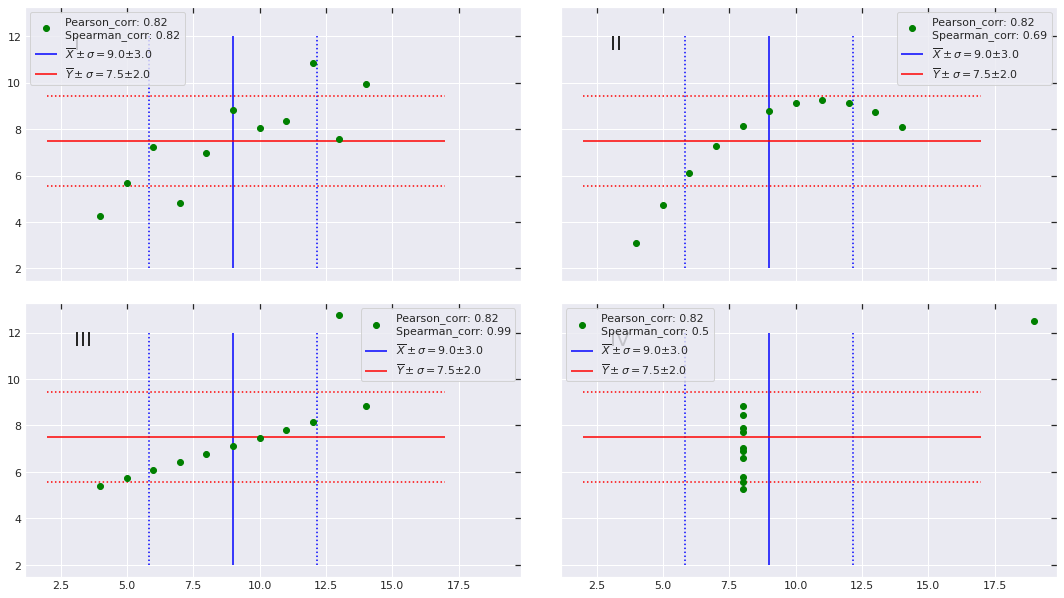

In [13]:
from scipy.stats import pearsonr, spearmanr

# OBS: Em prol da visualização dos resultados, vou trabalhar com o desvio padrão no lugar da variância

# Carregando cada dataset
results = {}
for key in datasets.keys():
    (x, y) = datasets[key]
    
    corr, p_value = pearsonr(x, y)
    corrs, p_values = spearmanr(x, y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x)
    var_y = np.var(y)
    
    results[key]= {'pearson_corr': corr, 
                   'spearman_corr': corrs, 
                   'mean_x': mean_x, 
                   'mean_y': mean_y, 
                   'var_x': var_x, 
                   'var_y': var_y}
    
    
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

fig.set_size_inches(18.5, 10.5)
for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')

    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o', color='green', 
            label=f"Pearson_corr: {round(results[label]['pearson_corr'],2)}\nSpearman_corr: {round(results[label]['spearman_corr'],2)}")
    
    # Média e desvio padrão de X
    ax.vlines(results[label]['mean_x'],2,12,color='blue', 
              label="$\overline{X} \pm \sigma = $"+f"{round(results[label]['mean_x'],2)}"+"$\pm$"+f"{round(np.sqrt(results[label]['var_x']))}")
    ax.vlines(results[label]['mean_x']+np.sqrt(results[label]['var_x']),2,12,color='blue',
              linestyles='dotted')
    ax.vlines(results[label]['mean_x']-np.sqrt(results[label]['var_x']),2,12,color='blue',
              linestyles='dotted')
              
    # Média e desvio padrão de  Y
    ax.hlines(results[label]['mean_y'], 2, 17,color='red', 
              label="$\overline{Y} \pm \sigma = $"+f"{round(results[label]['mean_y'],2)}"+"$\pm$"+f"{round(np.sqrt(results[label]['var_y']))}")
    ax.hlines(results[label]['mean_y']+np.sqrt(results[label]['var_y']), 2, 17,color='red', 
              linestyles='dotted')
    ax.hlines(results[label]['mean_y']-np.sqrt(results[label]['var_y']), 2, 17,color='red', 
              linestyles='dotted')
    
    ax.legend()

plt.show()

Podemos notar que, embora o "formato" dos dados seja bem diferente, tanto suas médias quanto variâncias permanecem constantes, bem como o coeficiente de correlação de Pearson. O mesmo já não pode ser dito sobre o coeficiente de correlação de Spearman, que aparente ser mais "sensível" à essas diferenças.